In [110]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report

In [2]:
# importing dataset
dataset = pd.read_csv('data/data_reddit.csv')
dataset_copy = pd.read_csv('data/data_reddit_copy.csv')
# checking whether the dataset has been imported correctly or not
dataset.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


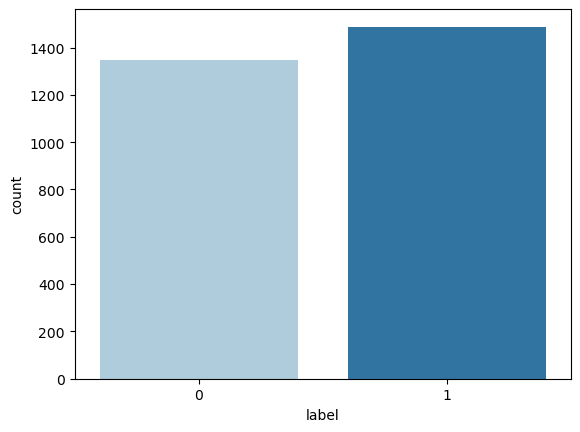

Percentage of no stress is 47.51322751322751
Percentage of stress is 52.48677248677248


In [84]:
# Data Cleaning
# Step 1: Selecting required columns
stress_analysis = dataset[['label',
                           'lex_liwc_function',
                           'lex_liwc_pronoun', 
                           'lex_liwc_ppron',
                           'lex_liwc_i',
                           'lex_liwc_we',
                           'lex_liwc_you',
                           'lex_liwc_shehe',
                           'lex_liwc_they',
                           'lex_liwc_ipron',
                           'lex_liwc_article',
                           'lex_liwc_prep',
                           'lex_liwc_auxverb',
                           'lex_liwc_adverb',
                           'lex_liwc_conj',
                           'lex_liwc_negate',
                           'lex_liwc_verb',
                           'lex_liwc_adj',
                           'lex_liwc_compare',
                           'lex_liwc_interrog',
                           'lex_liwc_affect',
                           'lex_liwc_posemo',
                           'lex_liwc_negemo',
                           'lex_liwc_anx',
                           'lex_liwc_anger',
                           'lex_liwc_sad',
                           'lex_liwc_social',
                           'lex_liwc_family',
                           'lex_liwc_friend',
                           'lex_liwc_female',
                           'lex_liwc_male',
                           'lex_liwc_cogproc',
                           'lex_liwc_insight',
                           'lex_liwc_cause',
                           'lex_liwc_discrep',
                           'lex_liwc_tentat',
                           'lex_liwc_certain',
                           'lex_liwc_differ',
                           'lex_liwc_percept',
                           'lex_liwc_see',
                           'lex_liwc_hear',
                           'lex_liwc_feel',
                           'lex_liwc_bio',
                           'lex_liwc_body',
                           'lex_liwc_health',
                           'lex_liwc_sexual',
                           'lex_liwc_ingest',
                           'lex_liwc_focuspast',
                           'lex_liwc_focuspresent',
                           'lex_liwc_focusfuture',
                           'social_upvote_ratio',
                           'social_num_comments']]
# stress_analysis.head()
stress_analysis_copy = dataset_copy[['label',
                           'lex_liwc_function',
                           'lex_liwc_pronoun', 
                           'lex_liwc_ppron',
                           'lex_liwc_i',
                           'lex_liwc_we',
                           'lex_liwc_you',
                           'lex_liwc_shehe',
                           'lex_liwc_they',
                           'lex_liwc_ipron',
                           'lex_liwc_article',
                           'lex_liwc_prep',
                           'lex_liwc_auxverb',
                           'lex_liwc_adverb',
                           'lex_liwc_conj',
                           'lex_liwc_negate',
                           'lex_liwc_verb',
                           'lex_liwc_adj',
                           'lex_liwc_compare',
                           'lex_liwc_interrog',
                           'lex_liwc_affect',
                           'lex_liwc_posemo',
                           'lex_liwc_negemo',
                           'lex_liwc_anx',
                           'lex_liwc_anger',
                           'lex_liwc_sad',
                           'lex_liwc_social',
                           'lex_liwc_family',
                           'lex_liwc_friend',
                           'lex_liwc_female',
                           'lex_liwc_male',
                           'lex_liwc_cogproc',
                           'lex_liwc_insight',
                           'lex_liwc_cause',
                           'lex_liwc_discrep',
                           'lex_liwc_tentat',
                           'lex_liwc_certain',
                           'lex_liwc_differ',
                           'lex_liwc_percept',
                           'lex_liwc_see',
                           'lex_liwc_hear',
                           'lex_liwc_feel',
                           'lex_liwc_bio',
                           'lex_liwc_body',
                           'lex_liwc_health',
                           'lex_liwc_sexual',
                           'lex_liwc_ingest',
                           'lex_liwc_focuspast',
                           'lex_liwc_focuspresent',
                           'lex_liwc_focusfuture',
                           'social_upvote_ratio',
                           'social_num_comments']]
# stress_analysis_copy.head()

# Step 2: Removing duplicates if available
stress_analysis = stress_analysis.drop_duplicates()
stress_analysis_copy = stress_analysis_copy.drop_duplicates()

# Step 3: Check if the dataset needs resampling of classes (imbalanced classes)
stress_analysis['label'].value_counts()
sns.countplot(x = 'label', data = stress_analysis, palette = 'Paired')
plt.show()

count_0 = len(stress_analysis[stress_analysis['label']==0])
count_1 = len(stress_analysis[stress_analysis['label']==1])
percent_0 = count_0/(count_0 + count_1)
print("Percentage of no stress is", percent_0 * 100)
percent_1 = count_1/(count_0 + count_1)
print("Percentage of stress is", percent_1 * 100)


# Step 4: Filling null values of each feature using mean
stress_analysis_mean = stress_analysis.mean(axis=0, skipna=True, numeric_only=False)
stress_analysis_copy_mean = stress_analysis_copy.mean(axis=0, skipna=True, numeric_only=False)
#print(stress_analysis_mean)
# print(stress_analysis_copy_mean)
stress_analysis['label'] = stress_analysis['label'].fillna(stress_analysis['label'].mode())
for i in stress_analysis.iloc[1 : , 1 : ]:
    stress_analysis[i].fillna(value=stress_analysis_mean[i], inplace=True)
    
#stress_analysis.head()

# for the copy
######
stress_analysis_copy['label'] = stress_analysis_copy['label'].fillna(stress_analysis_copy['label'].mode())
for i in stress_analysis_copy.iloc[1 : , 1 : ]:
    stress_analysis_copy[i].fillna(value=stress_analysis_copy_mean[i], inplace=True)
######

#stress_analysis.head()
# stress_analysis_copy.head()

In [4]:
# for linguistic styles and common grammar
stress_ling_com = stress_analysis.iloc[1 : , : 20].drop(columns = ['lex_liwc_function'])
#stress_ling_com.head()
stress_ling_com_X = preprocessing.StandardScaler().fit_transform(stress_ling_com.iloc[1 : , 1 : 20])
#print(stress_ling_com_X)
stress_ling_com_y = stress_ling_com.iloc[1 : , 0]
#print(stress_ling_com_y)

In [5]:
# split into train and test data
stress_ling_com_X_train, stress_ling_com_X_test, stress_ling_com_y_train, stress_ling_com_y_test = train_test_split(stress_ling_com_X, stress_ling_com_y, test_size=0.30)

In [6]:
# logistic regression
stress_ling_com_logreg = LogisticRegression()
stress_ling_com_logreg.fit(stress_ling_com_X_train, stress_ling_com_y_train)
stress_ling_com_y_pred = stress_ling_com_logreg.predict(stress_ling_com_X_test)
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(accuracy_score(stress_ling_com_y_test, stress_ling_com_y_pred)))

Accuracy of logistic regression classifier on test set: 0.6753


[[229 179]
 [112 330]]

 Precision of the model: 
0.6483300589390962

 Recall of the model: 
0.746606334841629


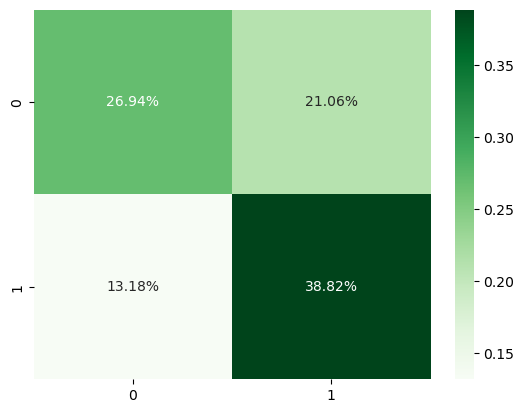

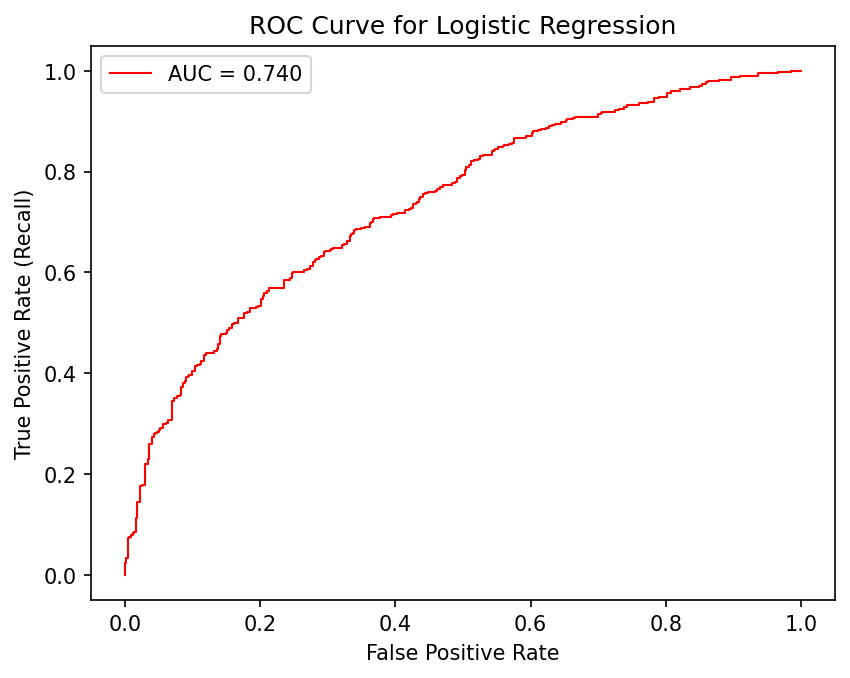

In [114]:
# calculating confusion matrix, precision, recall, ROC curve for logistic regression
# confusion matrix
cf_matrix = confusion_matrix(stress_ling_com_y_test, stress_ling_com_y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Greens')
print(cf_matrix)
# precision
precision = precision_score(stress_ling_com_y_test, stress_ling_com_y_pred)
print('\n Precision of the model: ')
print(precision)
# recall
recall = recall_score(stress_ling_com_y_test, stress_ling_com_y_pred)
print('\n Recall of the model: ')
print(recall)

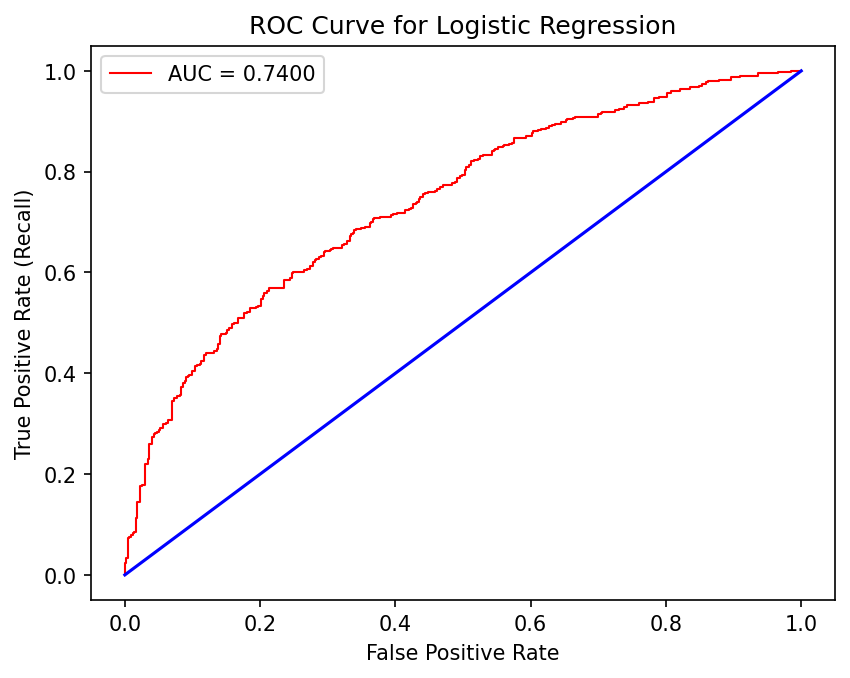

In [155]:
# ROC Curve
stress_ling_com_y_prob = stress_ling_com_logreg.predict_proba(stress_ling_com_X_test)
fpr, tpr, thresholds = roc_curve(stress_ling_com_y_test, stress_ling_com_y_prob[:,0], pos_label=0)
area_roc_auc = auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='red', label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color = 'b')
plt.title('ROC Curve for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

In [7]:
# gaussian Naive Bayes
stress_ling_com_gaussianNB = GaussianNB()
stress_ling_com_gaussianNB.fit(stress_ling_com_X_train, stress_ling_com_y_train)
stress_ling_com_y_pred = stress_ling_com_gaussianNB.predict(stress_ling_com_X_test)
print('Accuracy of gaussian naive bayes classifier on test set: {:.4f}'.format(accuracy_score(stress_ling_com_y_test, stress_ling_com_y_pred)))

Accuracy of gaussian naive bayes classifier on test set: 0.6600


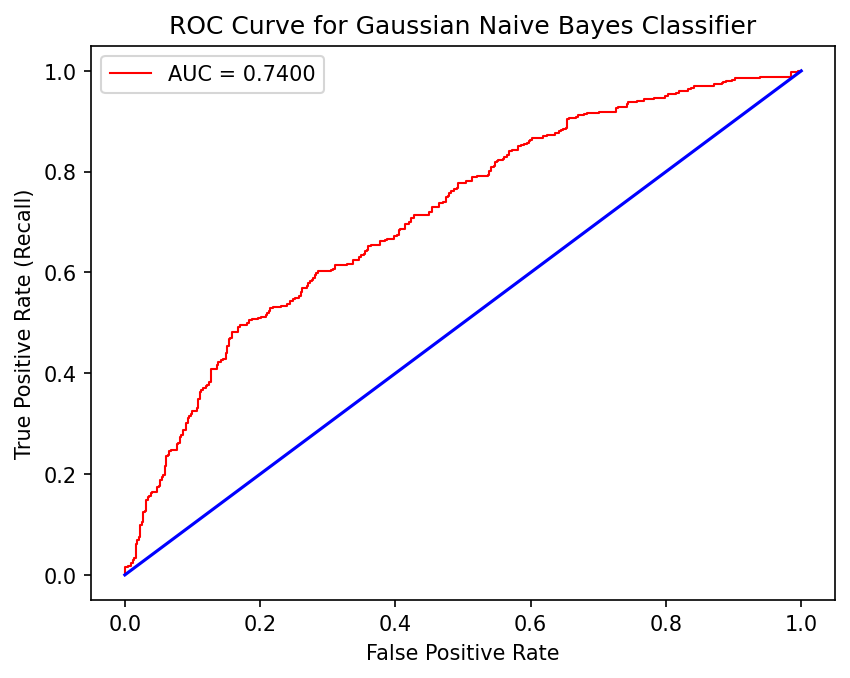

In [156]:
# calculating ROC Curve for Gaussian Naive Bayes Classifier
# ROC Curve
stress_ling_com_y_prob = stress_ling_com_gaussianNB.predict_proba(stress_ling_com_X_test)
fpr, tpr, thresholds = roc_curve(stress_ling_com_y_test, stress_ling_com_y_prob[:,0], pos_label=0)
area_roc_auc = auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='red', label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color = 'b')
plt.title('ROC Curve for Gaussian Naive Bayes Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

In [8]:
# decision tree classifier
stress_ling_com_dectree = DecisionTreeClassifier(criterion='entropy',random_state=0) 
stress_ling_com_dectree.fit(stress_ling_com_X_train,stress_ling_com_y_train)
stress_ling_com_y_pred = stress_ling_com_dectree.predict(stress_ling_com_X_test)
print('Accuracy of decision tree classifier on test set: {:.4f}'.format(accuracy_score(stress_ling_com_y_test, stress_ling_com_y_pred)))

Accuracy of decision tree classifier on test set: 0.5824


[[229 179]
 [112 330]]

 Precision of the model: 
0.6483300589390962

 Recall of the model: 
0.746606334841629


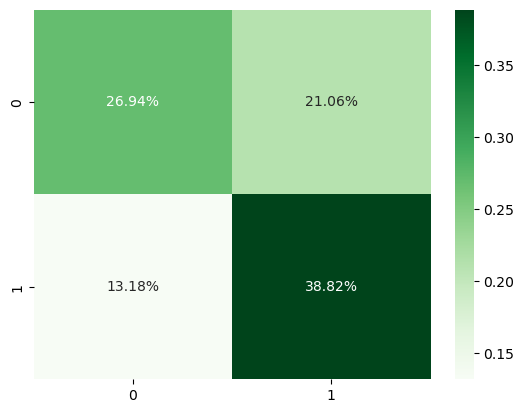

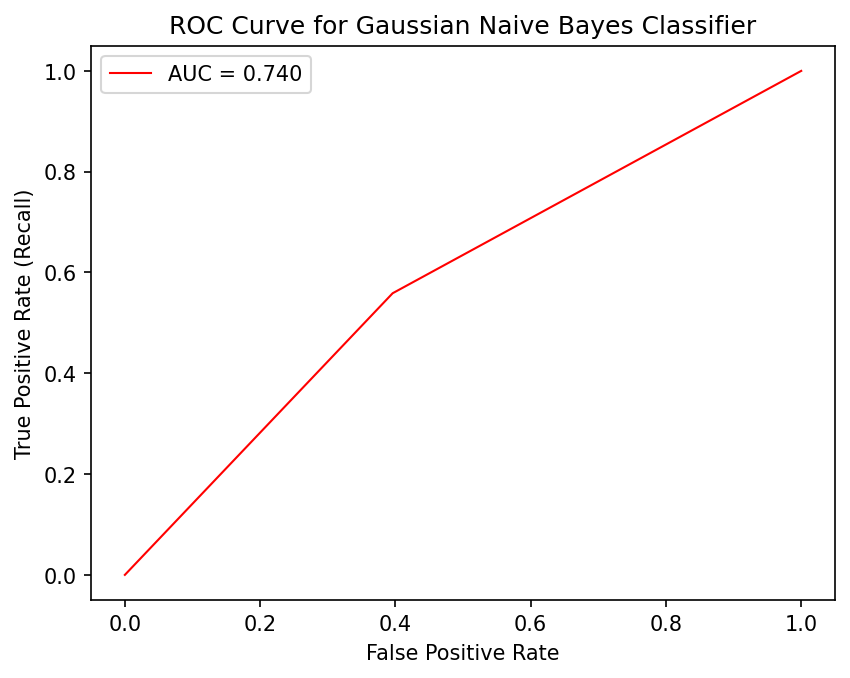

In [117]:
# calculating ROC curve for decision tree classifier
# ROC Curve
stress_ling_com_y_prob = stress_ling_com_dectree.predict_proba(stress_ling_com_X_test)
fpr, tpr, thresholds = roc_curve(stress_ling_com_y_test, stress_ling_com_y_prob[:,0], pos_label=0)
area_roc_auc = auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='red', label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color = 'b')
plt.title('ROC Curve for Decision Tree Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

In [118]:
# support vector machines with linear kernel
stress_ling_com_svm = svm.SVC(kernel="linear", C = 1)
stress_ling_com_svm.fit(stress_ling_com_X_train, stress_ling_com_y_train)
stress_ling_com_y_pred = stress_ling_com_svm.predict(stress_ling_com_X_test)
print('Accuracy of support vector machine on test set: {:.4f}'.format(accuracy_score(stress_ling_com_y_test, stress_ling_com_y_pred)))

Accuracy of support vector machine on test set: 0.6824


In [88]:
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, stress_ling_com_X_train, stress_ling_com_y_train, cv=5)
scores
print("%0.4f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.6954 accuracy with a standard deviation of 0.02


In [126]:
# ensemble method using VotingClassifier()
ensemble_model_1 = LogisticRegression()
ensemble_model_2 = svm.SVC(kernel="linear")
ensemble_model_3 = RandomForestClassifier()
ensemble_final_model = VotingClassifier(estimators=[('lr', ensemble_model_1), ('svm', ensemble_model_2), ('rf', ensemble_model_3)], voting='hard')
ensemble_final_model.fit(stress_ling_com_X_train, stress_ling_com_y_train)
y_pred_final = ensemble_final_model.predict(stress_ling_com_X_test)
print(log_loss(stress_ling_com_y_pred, y_pred_final))
print('Accuracy of ensemble method using Voting Classifier on test set: {:.4f}'.format(accuracy_score(stress_ling_com_y_test, stress_ling_com_y_pred)))

0.7720460591712874
Accuracy of ensemble method using Voting Classifier on test set: 0.6824


In [157]:
# calculating ROC curve for decision tree classifier
# ROC Curve
stress_ling_com_y_prob = ensemble_final_model.predict_proba(stress_ling_com_X_test)
fpr, tpr, thresholds = roc_curve(stress_ling_com_y_test, stress_ling_com_y_prob[:,0], pos_label=0)
area_roc_auc = auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='red', label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color = 'b')
plt.title('ROC Curve for Decision Tree Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

AttributeError: predict_proba is not available when voting='hard'

In [11]:
# ensemble method using BaggingClassifier()
stress_ling_com_bagging = BaggingClassifier(base_estimator=xgb.XGBClassifier())
stress_ling_com_bagging.fit(stress_ling_com_X_train, stress_ling_com_y_train)
stress_ling_com_y_pred = stress_ling_com_bagging.predict(stress_ling_com_X_test)
print('Accuracy of ensemble method using Bagging Classifier on test set: {:.4f}'.format(accuracy_score(stress_ling_com_y_test, stress_ling_com_y_pred)))

Accuracy of ensemble method using Bagging Classifier on test set: 0.6447


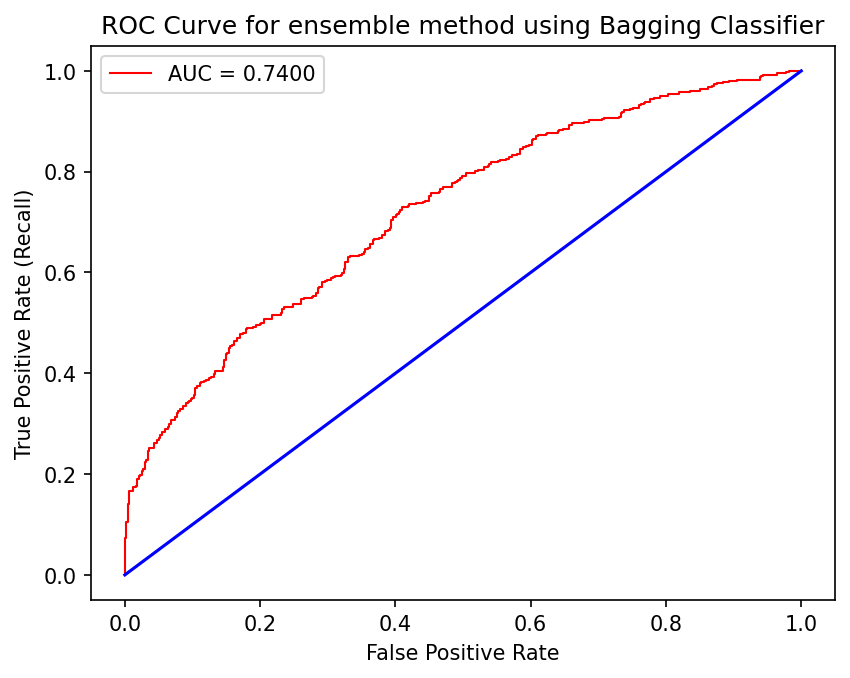

In [158]:
# calculating ROC curve for ensemble method using Bagging Classifier
# ROC Curve
stress_ling_com_y_prob = stress_ling_com_bagging.predict_proba(stress_ling_com_X_test)
fpr, tpr, thresholds = roc_curve(stress_ling_com_y_test, stress_ling_com_y_prob[:,0], pos_label=0)
area_roc_auc = auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='red', label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color = 'b')
plt.title('ROC Curve for ensemble method using Bagging Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

In [12]:
# ensemble method using BoostingClassifier()
stress_ling_com_boosting = GradientBoostingClassifier() 
stress_ling_com_boosting.fit(stress_ling_com_X_train, stress_ling_com_y_train)
stress_ling_com_y_pred = stress_ling_com_boosting.predict(stress_ling_com_X_test)
print('Accuracy of ensemble method using Boosting Classifier on test set: {:.4f}'.format(accuracy_score(stress_ling_com_y_test, stress_ling_com_y_pred)))

Accuracy of ensemble method using Bagging Classifier on test set: 0.6576


[[229 179]
 [ 91 351]]

 Precision of the model: 
0.6622641509433962

 Recall of the model: 
0.7941176470588235


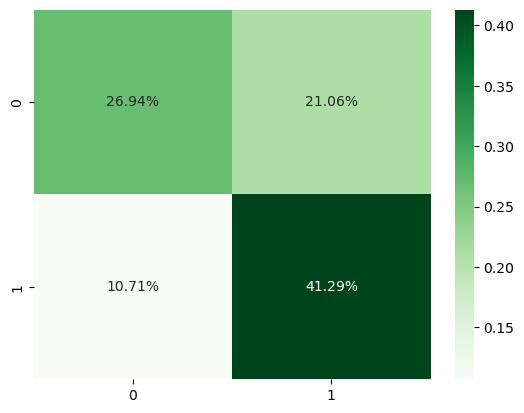

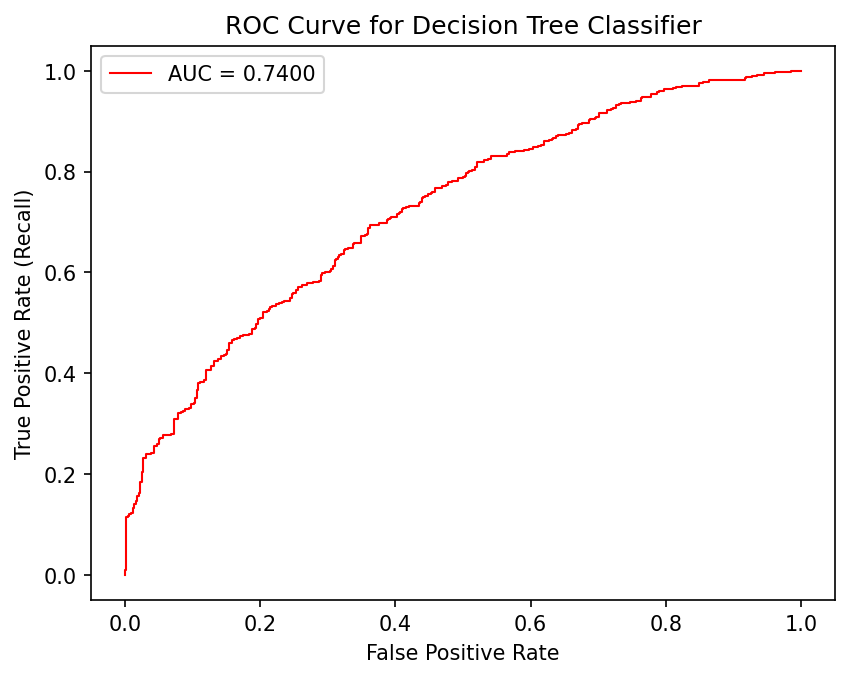

In [129]:
# calculating ROC curve for ensemble method using Boosting Classifier
# ROC Curve
stress_ling_com_y_prob = stress_ling_com_boosting.predict_proba(stress_ling_com_X_test)
fpr, tpr, thresholds = roc_curve(stress_ling_com_y_test, stress_ling_com_y_prob[:,0], pos_label=0)
area_roc_auc = auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='red', label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color = 'b')
plt.title('ROC Curve for Ensemble Method using Boosting Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

In [13]:
# for psychological processes
stress_psycho_X = preprocessing.StandardScaler().fit_transform(stress_analysis.iloc[1 : , 21 : 26])
#print(stress_psycho_X)
stress_psycho_y = stress_analysis.iloc[1 : , 0]
#print(stress_psycho_y)

In [14]:
# split into train and test data
stress_psycho_X_train, stress_psycho_X_test, stress_psycho_y_train, stress_psycho_y_test = train_test_split(stress_psycho_X, stress_psycho_y, test_size=0.30)

In [15]:
# logistic regression
stress_psycho_logreg = LogisticRegression()
stress_psycho_logreg.fit(stress_psycho_X_train, stress_psycho_y_train)
stress_psycho_y_pred = stress_psycho_logreg.predict(stress_psycho_X_test)
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(accuracy_score(stress_psycho_y_test, stress_psycho_y_pred)))

Accuracy of logistic regression classifier on test set: 0.7098


[[274 138]
 [130 309]]

 Precision of the model: 
0.6912751677852349

 Recall of the model: 
0.7038724373576309


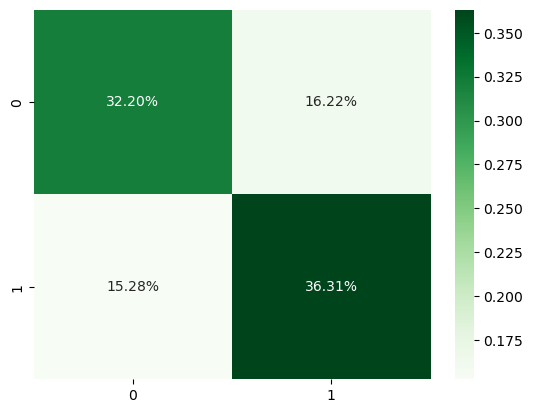

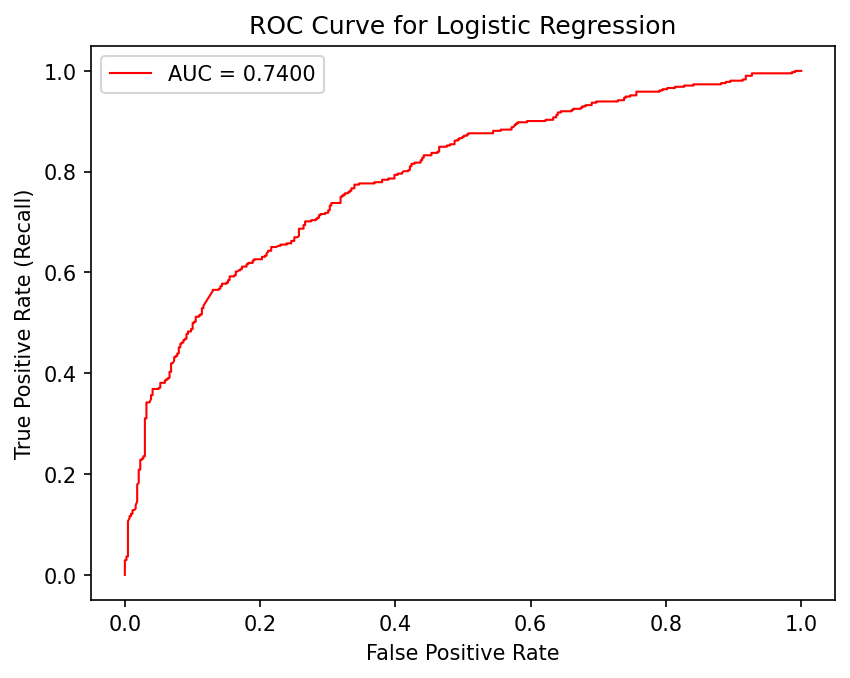

In [132]:
# calculating confusion matrix, precision, recall, ROC curve for logistic regression
# confusion matrix
cf_matrix = confusion_matrix(stress_psycho_y_test, stress_psycho_y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Greens')
print(cf_matrix)
# precision
precision = precision_score(stress_psycho_y_test, stress_psycho_y_pred)
print('\n Precision of the model: ')
print(precision)
# recall
recall = recall_score(stress_psycho_y_test, stress_psycho_y_pred)
print('\n Recall of the model: ')
print(recall)

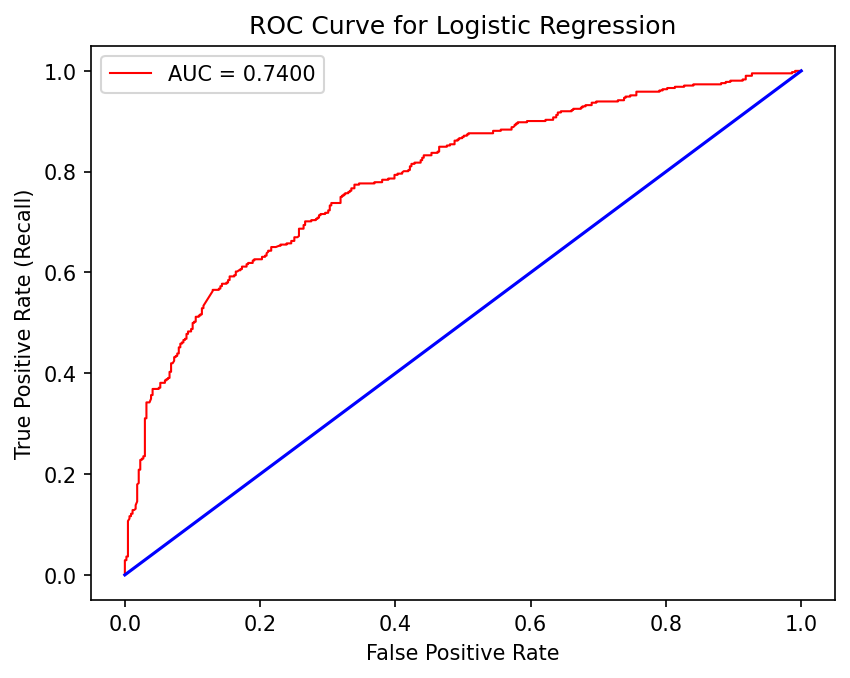

In [159]:
# ROC Curve
stress_psycho_y_prob = stress_psycho_logreg.predict_proba(stress_psycho_X_test)
fpr, tpr, thresholds = roc_curve(stress_psycho_y_test, stress_psycho_y_prob[:,0], pos_label=0)
area_roc_auc = auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='red', label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color = 'b')
plt.title('ROC Curve for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

In [16]:
# gaussian naive bayes
stress_psycho_gaussianNB = GaussianNB()
stress_psycho_gaussianNB.fit(stress_psycho_X_train, stress_psycho_y_train)
stress_psycho_y_pred = stress_psycho_gaussianNB.predict(stress_psycho_X_test)
print('Accuracy of gaussian naive bayes classifier on test set: {:.4f}'.format(accuracy_score(stress_psycho_y_test, stress_psycho_y_pred)))

Accuracy of gaussian naive bayes classifier on test set: 0.6710


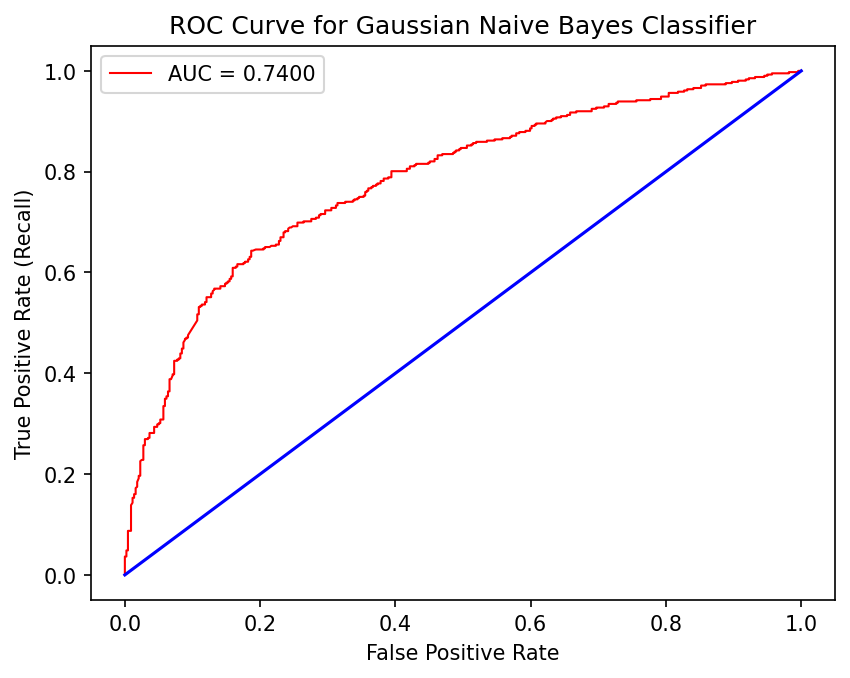

In [160]:
# calculating ROC curve for Gaussian Naive Bayes Classifier
# ROC Curve
stress_psycho_y_prob = stress_psycho_gaussianNB.predict_proba(stress_psycho_X_test)
fpr, tpr, thresholds = roc_curve(stress_psycho_y_test, stress_psycho_y_prob[:,0], pos_label=0)
area_roc_auc = auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='red', label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color = 'b')
plt.title('ROC Curve for Gaussian Naive Bayes Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

In [17]:
# decision tree classifier
stress_psycho_dectree = DecisionTreeClassifier(criterion='entropy',random_state=0) 
stress_psycho_dectree.fit(stress_psycho_X_train,stress_psycho_y_train)
stress_psycho_y_pred = stress_psycho_dectree.predict(stress_psycho_X_test)
print('Accuracy of decision tree classifier on test set: {:.4f}'.format(accuracy_score(stress_psycho_y_test, stress_psycho_y_pred)))

Accuracy of decision tree classifier on test set: 0.6533


[[274 138]
 [130 309]]

 Precision of the model: 
0.6912751677852349

 Recall of the model: 
0.7038724373576309


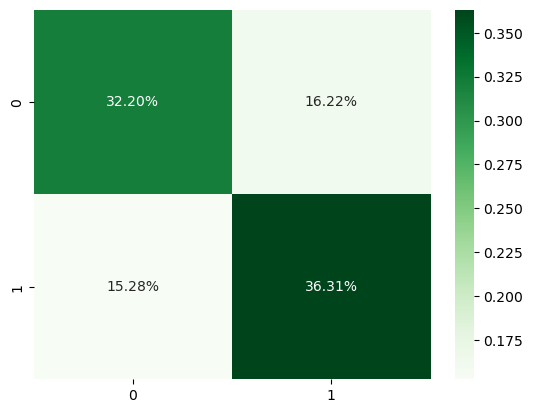

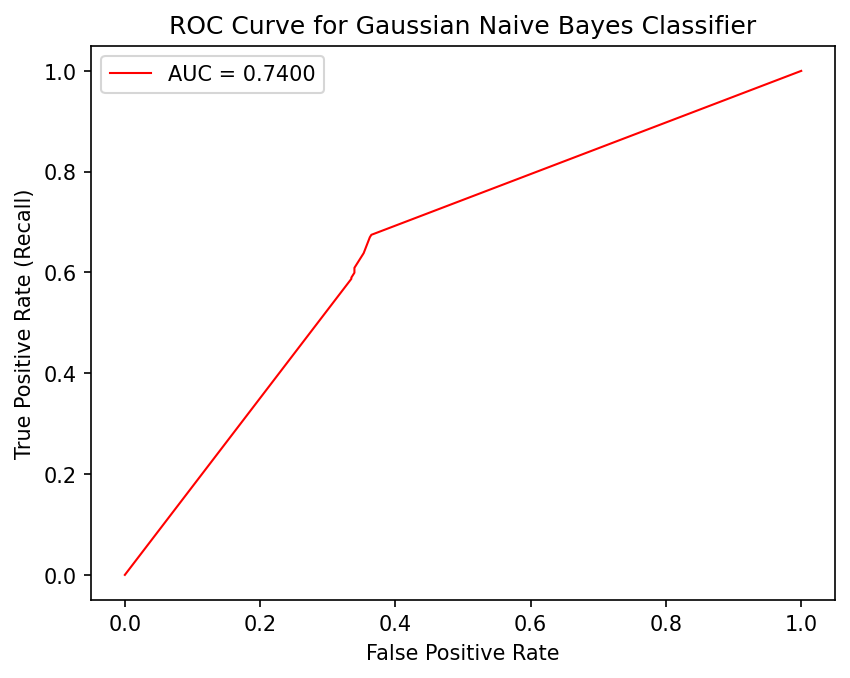

In [134]:
# calculating ROC curve for decision tree classifier
# ROC Curve
stress_psycho_y_prob = stress_psycho_dectree.predict_proba(stress_psycho_X_test)
fpr, tpr, thresholds = roc_curve(stress_psycho_y_test, stress_psycho_y_prob[:,0], pos_label=0)
area_roc_auc = auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='red', label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color = 'b')
plt.title('ROC Curve for Gaussian Naive Bayes Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

In [18]:
# support vector machines with linear kernel
stress_psycho_svm = svm.SVC(kernel="linear")
stress_psycho_svm.fit(stress_psycho_X_train, stress_psycho_y_train)
stress_psycho_y_pred = stress_psycho_svm.predict(stress_psycho_X_test)
print('Accuracy of support vector machine on test set: {:.4f}'.format(accuracy_score(stress_psycho_y_test, stress_psycho_y_pred)))

Accuracy of support vector machine on test set: 0.7145


In [19]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [20]:
# ensemble method using VotingClassifier()
ensemble_model_1 = LogisticRegression()
ensemble_model_2 = svm.SVC(kernel="linear")
ensemble_model_3 = RandomForestClassifier()
ensemble_final_model = VotingClassifier(estimators=[('lr', ensemble_model_1), ('svm', ensemble_model_2), ('rf', ensemble_model_3)], voting='hard')
ensemble_final_model.fit(stress_psycho_X_train, stress_psycho_y_train)
y_pred_final = ensemble_final_model.predict(stress_psycho_X_test)
print(log_loss(stress_psycho_y_pred, y_pred_final))
print('Accuracy of ensemble method (Voting Classifier) on test set: {:.4f}'.format(accuracy_score(stress_psycho_y_test, stress_psycho_y_pred)))

0.44645656441635756
Accuracy of ensemble method (Voting Classifier) on test set: 0.7145


In [21]:
# ensemble method using BaggingClassifier()
stress_psycho_bagging = BaggingClassifier(base_estimator=xgb.XGBClassifier())
stress_psycho_bagging.fit(stress_psycho_X_train, stress_psycho_y_train)
stress_psycho_y_pred = stress_psycho_bagging.predict(stress_psycho_X_test)
print('Accuracy of ensemble method using Bagging Classifier on test set: {:.4f}'.format(accuracy_score(stress_psycho_y_test, stress_psycho_y_pred)))

Accuracy of ensemble method using Bagging Classifier on test set: 0.6968


In [ ]:
# calculating ROC curve for ensemble method using Bagging Classifier
# ROC Curve
stress_psycho_y_prob = stress_psycho_bagging.predict_proba(stress_psycho_X_test)
fpr, tpr, thresholds = roc_curve(stress_psycho_y_test, stress_psycho_y_prob[:,0], pos_label=0)
area_roc_auc = auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='red', label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color = 'b')
plt.title('ROC Curve for Ensemble Method using Bagging Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

In [22]:
# ensemble method using BoostingClassifier()
stress_psycho_boosting = GradientBoostingClassifier() 
stress_psycho_boosting.fit(stress_psycho_X_train, stress_psycho_y_train)
stress_psycho_y_pred = stress_psycho_boosting.predict(stress_psycho_X_test)
print('Accuracy of ensemble method using Boosting Classifier on test set: {:.4f}'.format(accuracy_score(stress_psycho_y_test, stress_psycho_y_pred)))

Accuracy of ensemble method using Boosting Classifier on test set: 0.6851


[[274 138]
 [130 309]]

 Precision of the model: 
0.6912751677852349

 Recall of the model: 
0.7038724373576309


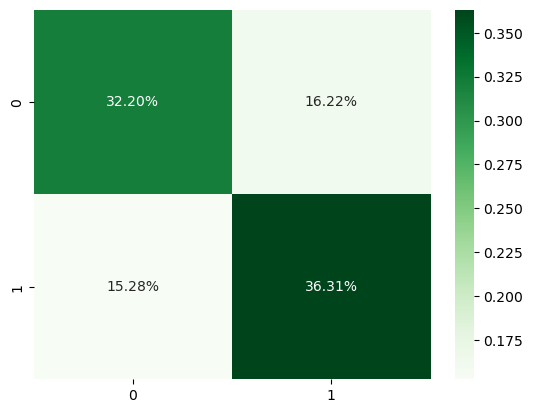

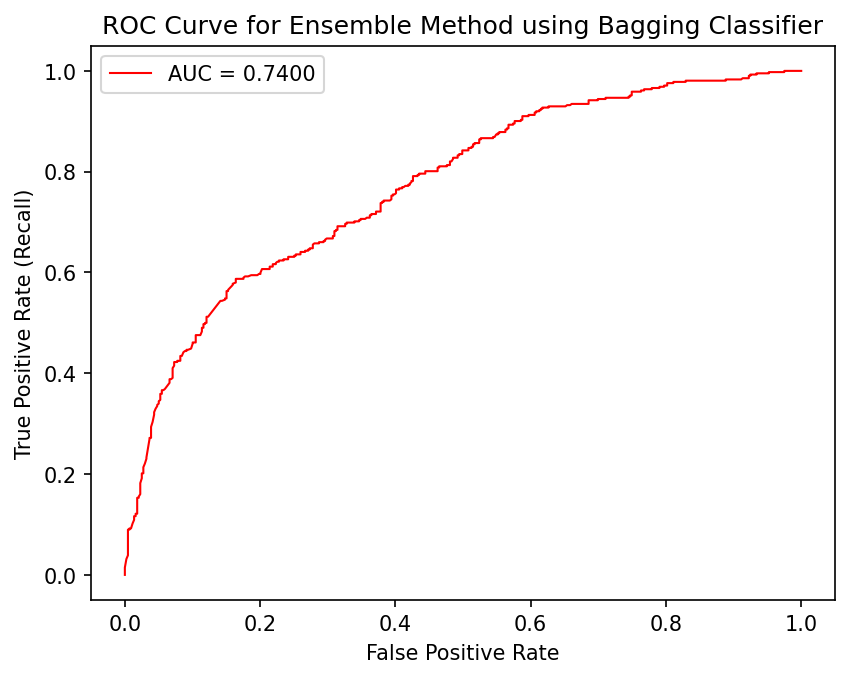

In [135]:
# calculating ROC curve for ensemble method using Boosting Classifier
# ROC Curve
stress_psycho_y_prob = stress_psycho_boosting.predict_proba(stress_psycho_X_test)
fpr, tpr, thresholds = roc_curve(stress_psycho_y_test, stress_psycho_y_prob[:,0], pos_label=0)
area_roc_auc = auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='red', label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color = 'b')
plt.title('ROC Curve for Ensemble Method using Bagging Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

In [23]:
# for social processes
stress_social_X = preprocessing.StandardScaler().fit_transform(stress_analysis.iloc[1 : , 27 : 31])
print(stress_social_X)
stress_social_y = stress_analysis.iloc[1 : , 0]
print(stress_social_y)

[[-0.49994508 -0.52961973 -0.54706538 -0.6359895 ]
 [-0.09798631  2.88994739  0.07663192  0.13527385]
 [-0.25207051  0.5181585  -0.41886093  1.95416992]
 ...
 [-0.49994508 -0.52961973 -0.54706538 -0.6359895 ]
 [ 1.46965288 -0.52961973  2.50905139 -0.6359895 ]
 [ 3.02389345 -0.52961973  4.31777356 -0.6359895 ]]
1       0
2       1
3       1
4       1
5       1
       ..
2833    0
2834    1
2835    0
2836    0
2837    1
Name: label, Length: 2834, dtype: int64


In [24]:
# split into train and test data
stress_social_X_train, stress_social_X_test, stress_social_y_train, stress_social_y_test = train_test_split(stress_social_X, stress_social_y, test_size=0.30)

In [25]:
# logistic regression
stress_social_logreg = LogisticRegression()
stress_social_logreg.fit(stress_social_X_train, stress_social_y_train)
stress_social_y_pred = stress_social_logreg.predict(stress_social_X_test)
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(accuracy_score(stress_social_y_test, stress_social_y_pred)))

Accuracy of logistic regression classifier on test set: 0.5617


[[125 275]
 [101 350]]

 Precision of the model: 
0.56

 Recall of the model: 
0.7760532150776053


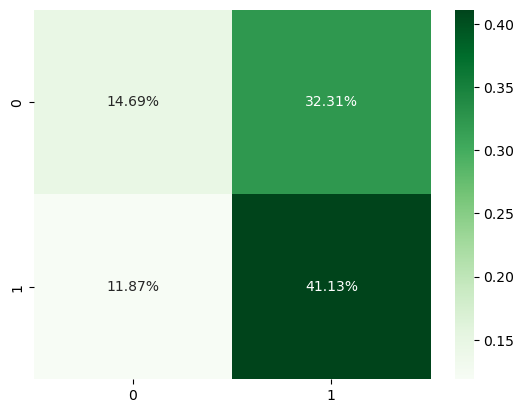

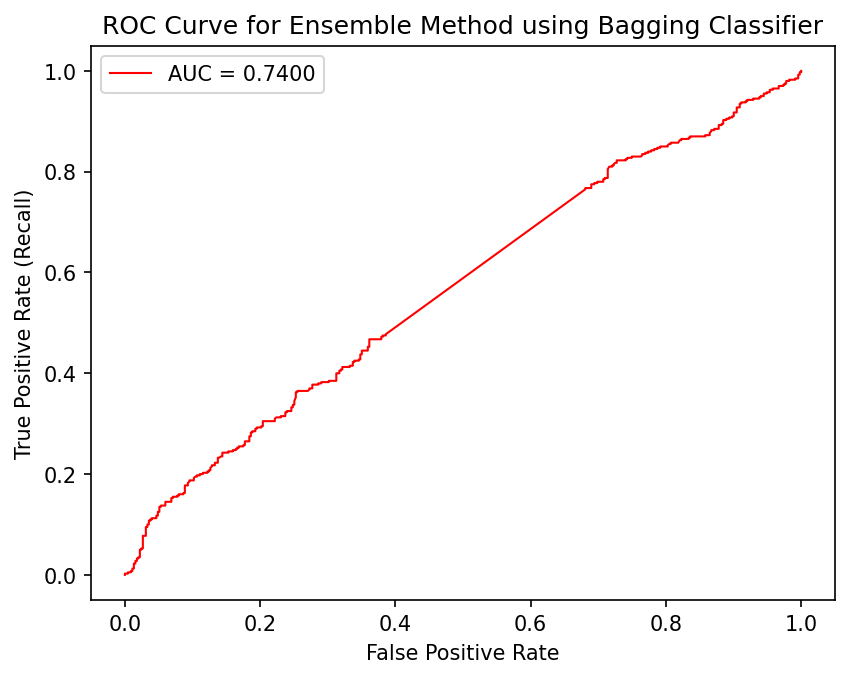

In [136]:
# calculating confusion matrix, precision, recall, ROC curve for Logistic Regression
# confusion matrix
cf_matrix = confusion_matrix(stress_social_y_test, stress_social_y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Greens')
print(cf_matrix)
# precision
precision = precision_score(stress_social_y_test, stress_social_y_pred)
print('\n Precision of the model: ')
print(precision)
# recall
recall = recall_score(stress_social_y_test, stress_social_y_pred)
print('\n Recall of the model: ')
print(recall)

In [ ]:
# ROC Curve
stress_social_y_prob = stress_social_logreg.predict_proba(stress_social_X_test)
fpr, tpr, thresholds = roc_curve(stress_social_y_test, stress_social_y_prob[:,0], pos_label=0)
area_roc_auc = auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='red', label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color = 'b')
plt.title('ROC Curve for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

In [26]:
# gaussian naive bayes
stress_social_gaussianNB = GaussianNB()
stress_social_gaussianNB.fit(stress_social_X_train, stress_social_y_train)
stress_social_y_pred = stress_social_gaussianNB.predict(stress_social_X_test)
print('Accuracy of gaussian naive bayes classifier on test set: {:.4f}'.format(accuracy_score(stress_social_y_test, stress_social_y_pred)))

Accuracy of gaussian naive bayes classifier on test set: 0.5664


[[125 275]
 [101 350]]

 Precision of the model: 
0.56

 Recall of the model: 
0.7760532150776053


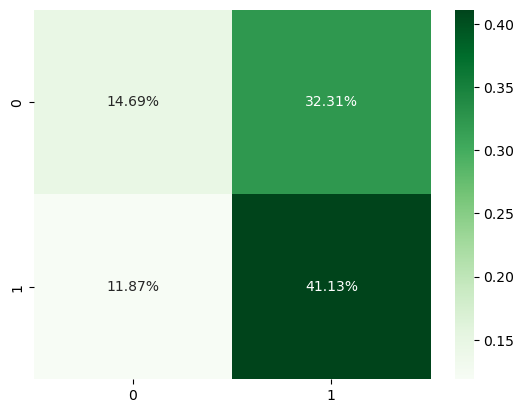

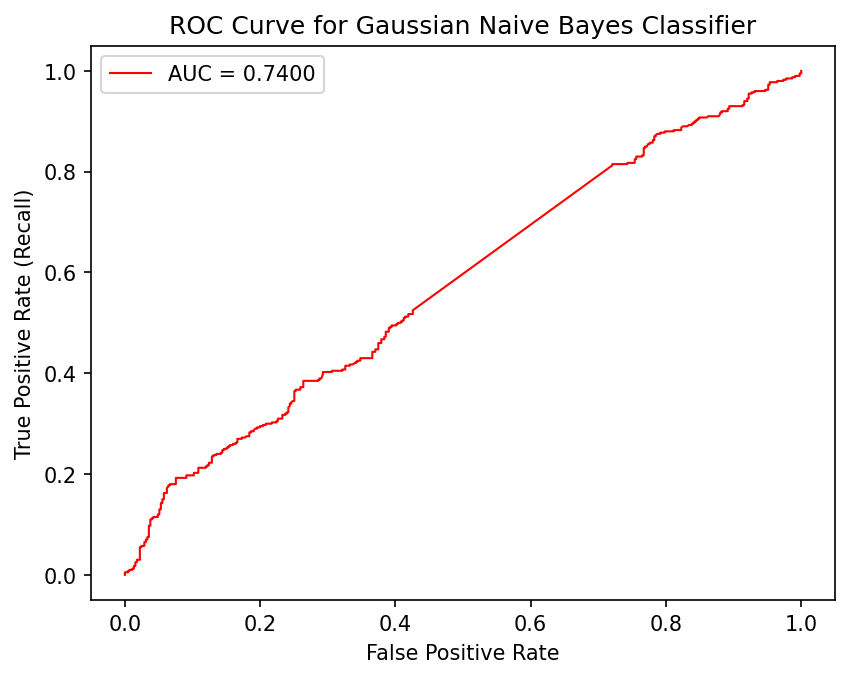

In [137]:
# calculating ROC curve for Gaussian Naive Bayes Classifier
# ROC Curve
stress_social_y_prob = stress_social_gaussianNB.predict_proba(stress_social_X_test)
fpr, tpr, thresholds = roc_curve(stress_social_y_test, stress_social_y_prob[:,0], pos_label=0)
area_roc_auc = auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='red', label=f'AUC = {roc_auc:.4f}')
plt.title('ROC Curve for Gaussian Naive Bayes Classifier')
plt.plot([0, 1], [0, 1], color = 'b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

In [27]:
# decision tree classifier
stress_social_dectree = DecisionTreeClassifier(criterion='entropy',random_state=0) 
stress_social_dectree.fit(stress_social_X_train,stress_social_y_train)
stress_social_y_pred = stress_social_dectree.predict(stress_social_X_test)
print('Accuracy of decision tree classifier on test set: {:.4f}'.format(accuracy_score(stress_social_y_test, stress_social_y_pred)))

Accuracy of decision tree classifier on test set: 0.5229


[[125 275]
 [101 350]]

 Precision of the model: 
0.56

 Recall of the model: 
0.7760532150776053


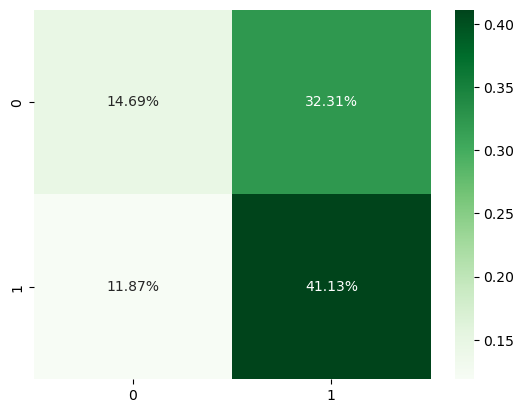

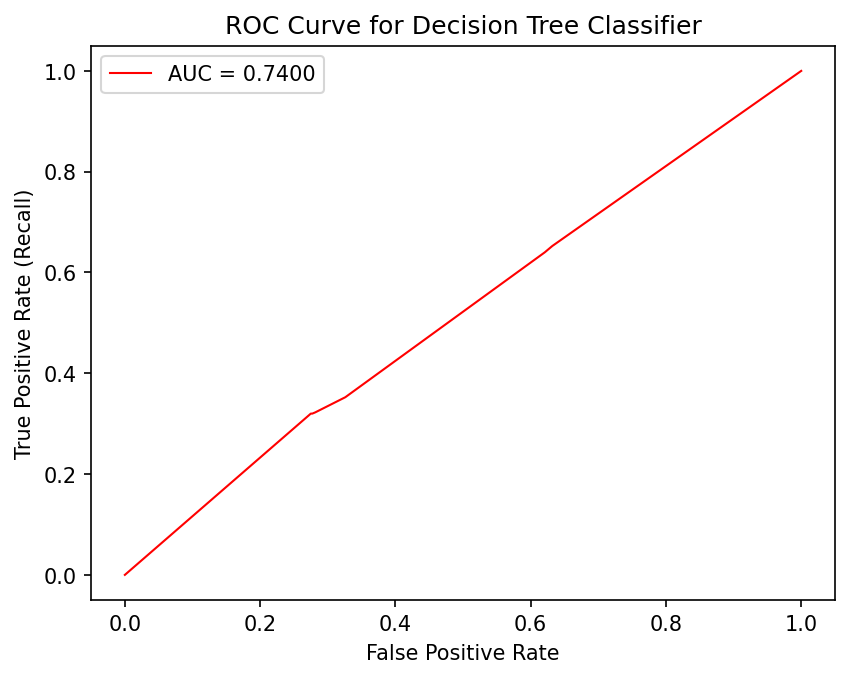

In [138]:
# calculating ROC curve for Decision Tree classifier
# ROC Curve
stress_social_y_prob = stress_social_dectree.predict_proba(stress_social_X_test)
fpr, tpr, thresholds = roc_curve(stress_social_y_test, stress_social_y_prob[:,0], pos_label=0)
area_roc_auc = auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='red', label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color = 'b')
plt.title('ROC Curve for Decision Tree Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

In [28]:
# support vector machines with linear kernel
stress_social_svm = svm.SVC(kernel="linear")
stress_social_svm.fit(stress_social_X_train, stress_social_y_train)
stress_social_y_pred = stress_social_svm.predict(stress_social_X_test)
print('Accuracy of support vector machine on test set: {:.4f}'.format(accuracy_score(stress_social_y_test, stress_social_y_pred)))

Accuracy of support vector machine on test set: 0.5652


In [29]:
# ensemble method using VotingClassifier()
ensemble_model_1 = LogisticRegression()
ensemble_model_2 = svm.SVC(kernel="linear")
ensemble_model_3 = RandomForestClassifier()
ensemble_final_model = VotingClassifier(estimators=[('lr', ensemble_model_1), ('svm', ensemble_model_2), ('rf', ensemble_model_3)], voting='hard')
ensemble_final_model.fit(stress_social_X_train, stress_social_y_train)
y_pred_final = ensemble_final_model.predict(stress_social_X_test)
print(log_loss(stress_social_y_pred, y_pred_final))
print('Accuracy of ensemble method (Voting Classifier) on test set: {:.4f}'.format(accuracy_score(stress_social_y_test, stress_social_y_pred)))

1.0552387617716552
Accuracy of ensemble method (Voting Classifier) on test set: 0.5652


In [30]:
# ensemble method using BaggingClassifier()
stress_social_bagging = BaggingClassifier(base_estimator=xgb.XGBClassifier())
stress_social_bagging.fit(stress_social_X_train, stress_social_y_train)
stress_social_y_pred = stress_social_bagging.predict(stress_social_X_test)
print('Accuracy of ensemble method using Bagging Classifier on test set: {:.4f}'.format(accuracy_score(stress_social_y_test, stress_social_y_pred)))

Accuracy of ensemble method using Bagging Classifier on test set: 0.5335


[[125 275]
 [101 350]]

 Precision of the model: 
0.56

 Recall of the model: 
0.7760532150776053


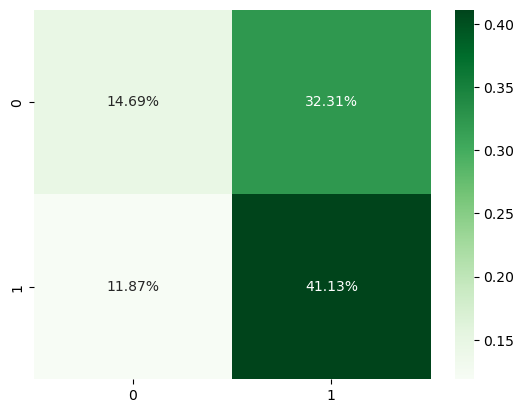

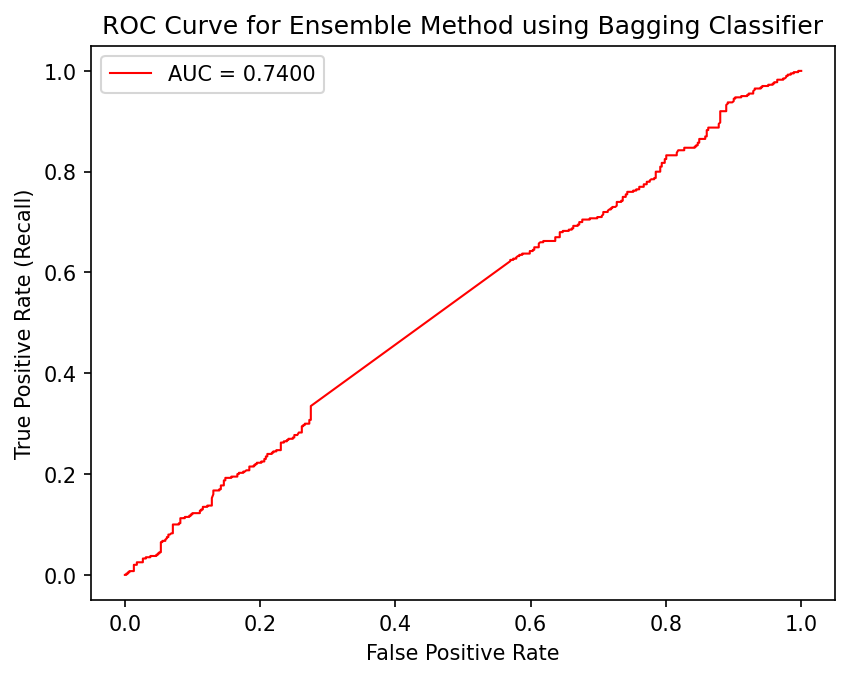

In [139]:
# calculating ROC curve for ensemble method using Bagging Classifier
# ROC Curve
stress_social_y_prob = stress_social_bagging.predict_proba(stress_social_X_test)
fpr, tpr, thresholds = roc_curve(stress_social_y_test, stress_social_y_prob[:,0], pos_label=0)
area_roc_auc = auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='red', label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color = 'b')
plt.title('ROC Curve for Ensemble Method using Bagging Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

In [31]:
# ensemble method using BoostingClassifier()
stress_social_boosting = GradientBoostingClassifier() 
stress_social_boosting.fit(stress_social_X_train, stress_social_y_train)
stress_social_y_pred = stress_social_boosting.predict(stress_social_X_test)
print('Accuracy of ensemble method using Boosting Classifier on test set: {:.4f}'.format(accuracy_score(stress_social_y_test, stress_social_y_pred)))

Accuracy of ensemble method using Boosting Classifier on test set: 0.5582


[[125 275]
 [101 350]]

 Precision of the model: 
0.56

 Recall of the model: 
0.7760532150776053


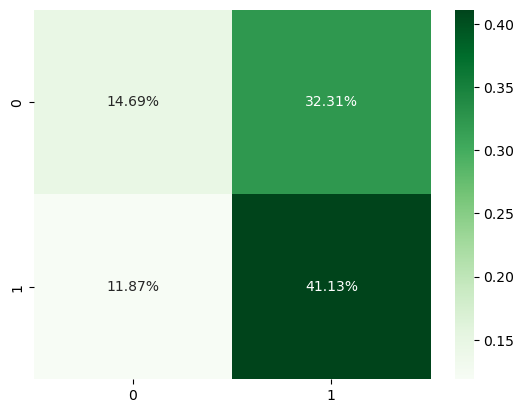

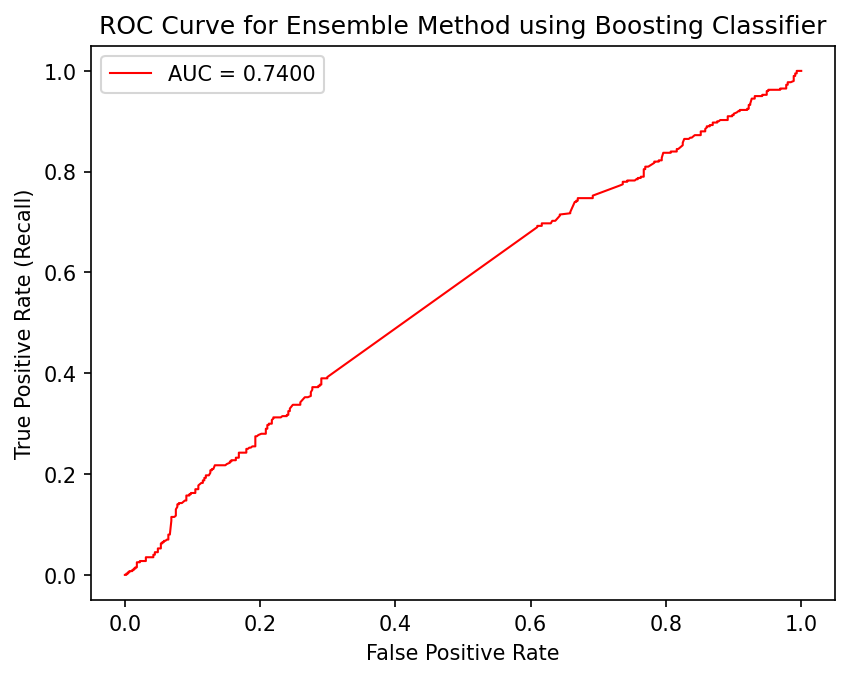

In [140]:
# calculating ROC curve for ensemble method using Boosting Classifier
# ROC Curve
stress_social_y_prob = stress_social_boosting.predict_proba(stress_social_X_test)
fpr, tpr, thresholds = roc_curve(stress_social_y_test, stress_social_y_prob[:,0], pos_label=0)
area_roc_auc = auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='red', label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color = 'b')
plt.title('ROC Curve for Ensemble Method using Boosting Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

In [32]:
# for cognitive processes
stress_cog_X = preprocessing.StandardScaler().fit_transform(stress_analysis.iloc[1 : , 32 : 38])
print(stress_cog_X)
stress_cog_y = stress_analysis.iloc[1 : , 0]
print(stress_cog_y)

[[-0.4545323  -1.04034592  0.88973845  0.85523701  0.17912644  0.96314646]
 [ 0.59502116 -0.31685493 -0.69375429 -0.13079195 -0.97148123 -0.85575773]
 [ 2.15156232 -0.60022223 -0.0593256  -0.58648661 -0.04722261  0.3096008 ]
 ...
 [-0.27219462 -1.04034592  0.15215063 -0.42542212  0.90847338 -0.68252876]
 [ 0.69286089 -1.04034592  0.5132076  -0.15043396 -0.97148123  1.32928952]
 [-0.49011038 -1.04034592 -0.10058926 -1.30538422 -0.97148123  1.19936779]]
1       0
2       1
3       1
4       1
5       1
       ..
2833    0
2834    1
2835    0
2836    0
2837    1
Name: label, Length: 2834, dtype: int64


In [33]:
# split into train and test data
stress_cog_X_train, stress_cog_X_test, stress_cog_y_train, stress_cog_y_test = train_test_split(stress_cog_X, stress_cog_y, test_size=0.30)

In [34]:
# logistic regression
stress_cog_logreg = LogisticRegression()
stress_cog_logreg.fit(stress_cog_X_train, stress_cog_y_train)
stress_cog_y_pred = stress_cog_logreg.predict(stress_cog_X_test)
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(accuracy_score(stress_cog_y_test, stress_cog_y_pred)))

Accuracy of logistic regression classifier on test set: 0.5758


[[214 175]
 [191 271]]

 Precision of the model: 
0.6076233183856502

 Recall of the model: 
0.5865800865800865


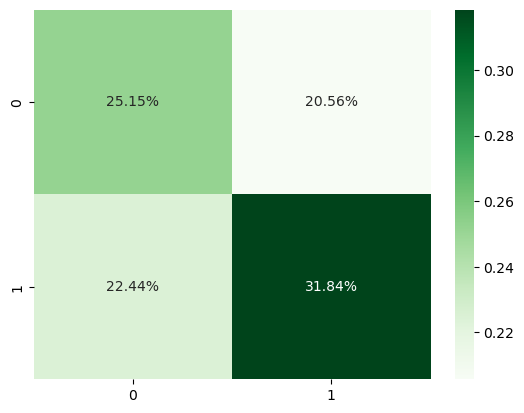

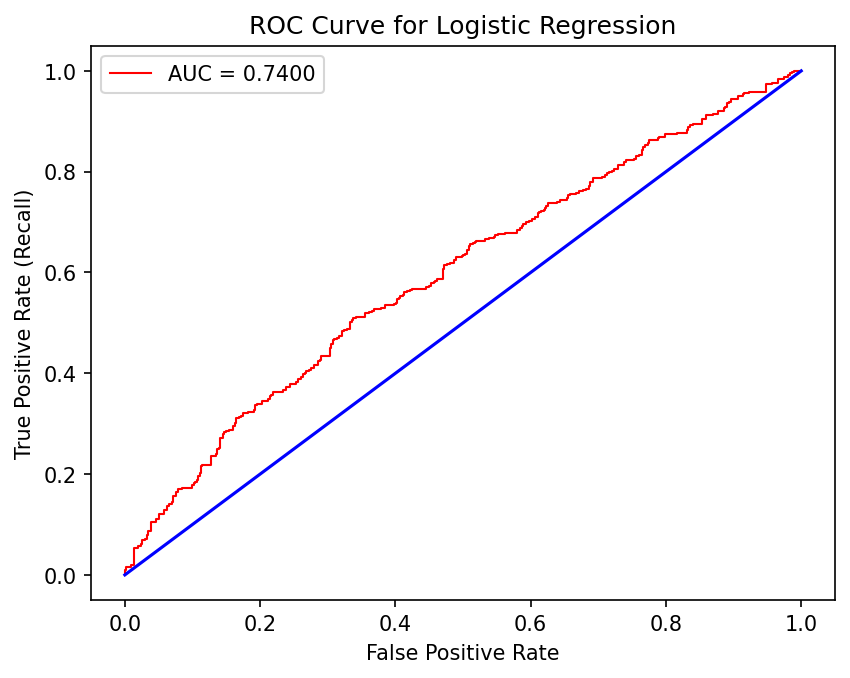

In [154]:
# calculating confusion matrix, precision, recall, ROC curve for logistic regression
# confusion matrix
cf_matrix = confusion_matrix(stress_cog_y_test, stress_cog_y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Greens')
print(cf_matrix)
# precision
precision = precision_score(stress_cog_y_test, stress_cog_y_pred)
print('\n Precision of the model: ')
print(precision)
# recall
recall = recall_score(stress_cog_y_test, stress_cog_y_pred)
print('\n Recall of the model: ')
print(recall)
# ROC Curve
stress_cog_y_prob = stress_cog_logreg.predict_proba(stress_cog_X_test)
fpr, tpr, thresholds = roc_curve(stress_cog_y_test, stress_cog_y_prob[:,0], pos_label=0)
area_roc_auc = auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='red', label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color = 'b')
plt.title('ROC Curve for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

In [35]:
# gaussian naive bayes
stress_cog_gaussianNB = GaussianNB()
stress_cog_gaussianNB.fit(stress_cog_X_train, stress_cog_y_train)
stress_cog_y_pred = stress_cog_gaussianNB.predict(stress_cog_X_test)
print('Accuracy of gaussian naive bayes classifier on test set: {:.4f}'.format(accuracy_score(stress_cog_y_test, stress_cog_y_pred)))

Accuracy of gaussian naive bayes classifier on test set: 0.5629


[[214 175]
 [191 271]]

 Precision of the model: 
0.6076233183856502

 Recall of the model: 
0.5865800865800865


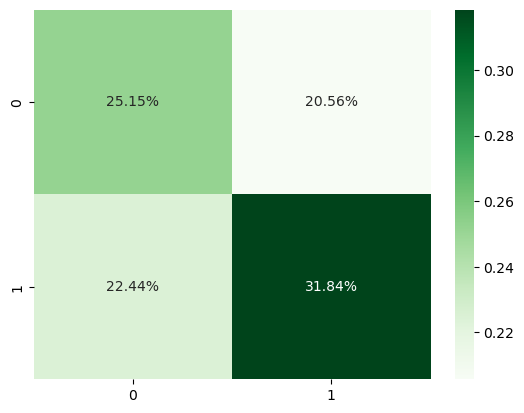

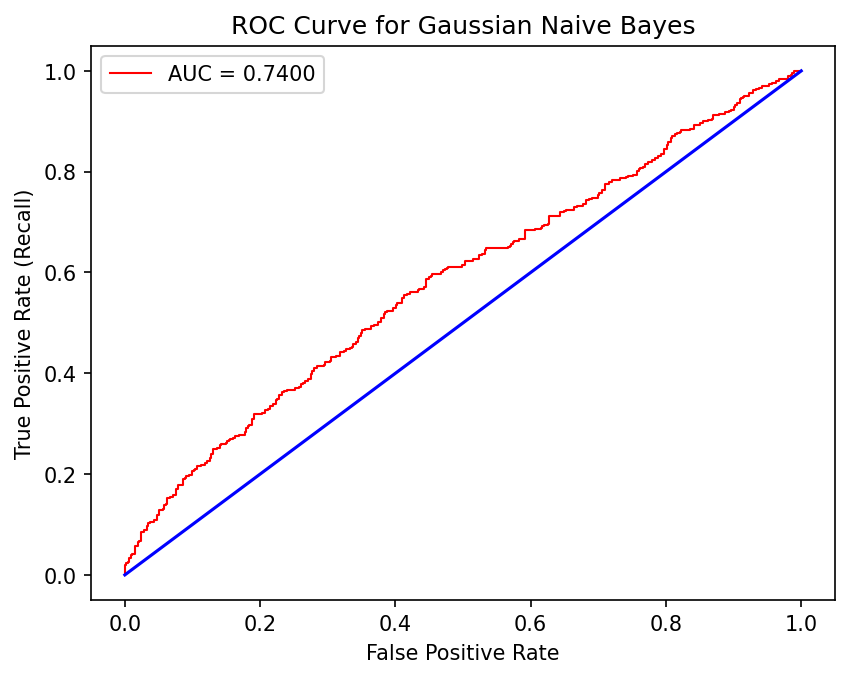

In [153]:
# calculating confusion matrix, precision, recall, ROC curve for gaussian naive bayes classifier
# confusion matrix
cf_matrix = confusion_matrix(stress_cog_y_test, stress_cog_y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Greens')
print(cf_matrix)
# precision
precision = precision_score(stress_cog_y_test, stress_cog_y_pred)
print('\n Precision of the model: ')
print(precision)
# recall
recall = recall_score(stress_cog_y_test, stress_cog_y_pred)
print('\n Recall of the model: ')
print(recall)
# ROC Curve
stress_cog_y_prob = stress_cog_gaussianNB.predict_proba(stress_cog_X_test)
fpr, tpr, thresholds = roc_curve(stress_cog_y_test, stress_cog_y_prob[:,0], pos_label=0)
area_roc_auc = auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='red', label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color = 'b')
plt.title('ROC Curve for Gaussian Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

In [36]:
# decision tree classifier
stress_cog_dectree = DecisionTreeClassifier(criterion='entropy',random_state=0) 
stress_cog_dectree.fit(stress_cog_X_train,stress_cog_y_train)
stress_cog_y_pred = stress_cog_dectree.predict(stress_cog_X_test)
print('Accuracy of decision tree classifier on test set: {:.4f}'.format(accuracy_score(stress_cog_y_test, stress_cog_y_pred)))

Accuracy of decision tree classifier on test set: 0.5476


[[214 175]
 [191 271]]

 Precision of the model: 
0.6076233183856502

 Recall of the model: 
0.5865800865800865


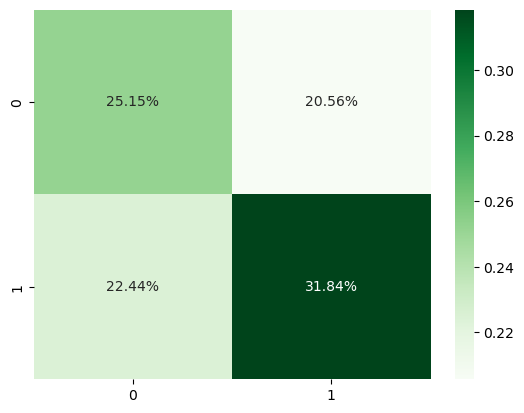

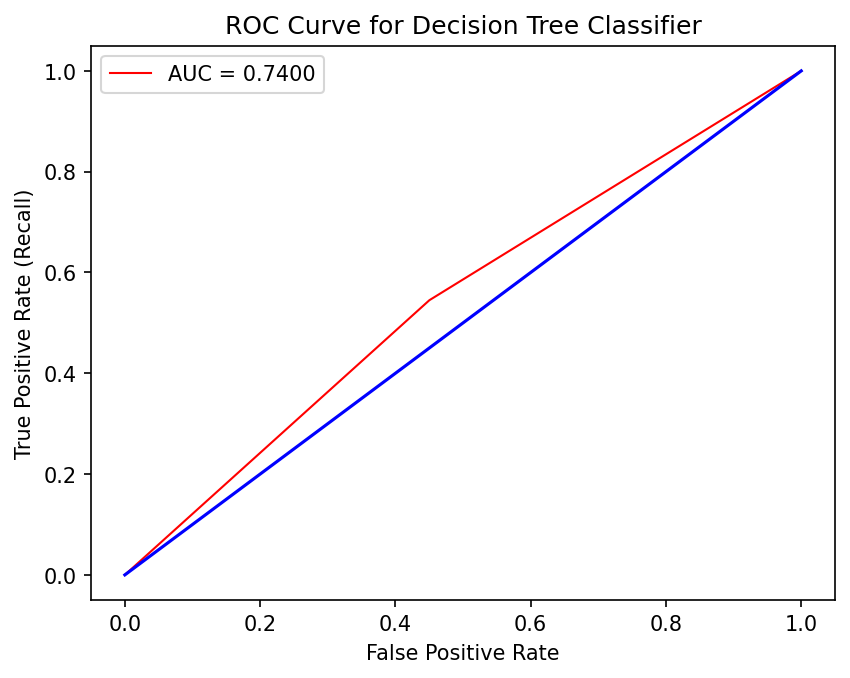

In [152]:
# calculating confusion matrix, precision, recall, ROC curve for decision tree classifier
# confusion matrix
cf_matrix = confusion_matrix(stress_cog_y_test, stress_cog_y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Greens')
print(cf_matrix)
# precision
precision = precision_score(stress_cog_y_test, stress_cog_y_pred)
print('\n Precision of the model: ')
print(precision)
# recall
recall = recall_score(stress_cog_y_test, stress_cog_y_pred)
print('\n Recall of the model: ')
print(recall)
# ROC Curve
stress_cog_y_prob = stress_cog_dectree.predict_proba(stress_cog_X_test)
fpr, tpr, thresholds = roc_curve(stress_cog_y_test, stress_cog_y_prob[:,0], pos_label=0)
area_roc_auc = auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='red', label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color = 'b')
plt.title('ROC Curve for Decision Tree Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

In [37]:
# support vector machines with linear kernel
stress_cog_svm = svm.SVC(kernel="linear")
stress_cog_svm.fit(stress_cog_X_train, stress_cog_y_train)
stress_cog_y_pred = stress_cog_svm.predict(stress_cog_X_test)
print('Accuracy of support vector machine on test set: {:.4f}'.format(accuracy_score(stress_cog_y_test, stress_cog_y_pred)))

Accuracy of support vector machine on test set: 0.5676


In [38]:
# ensemble method using VotingClassifier()
ensemble_model_1 = LogisticRegression()
ensemble_model_2 = svm.SVC(kernel="linear")
ensemble_model_3 = RandomForestClassifier()
ensemble_final_model = VotingClassifier(estimators=[('lr', ensemble_model_1), ('svm', ensemble_model_2), ('rf', ensemble_model_3)], voting='hard')
ensemble_final_model.fit(stress_cog_X_train, stress_cog_y_train)
y_pred_final = ensemble_final_model.predict(stress_cog_X_test)
print(log_loss(stress_cog_y_pred, y_pred_final))
print('Accuracy of ensemble method (Voting Classifier) on test set: {:.4f}'.format(accuracy_score(stress_cog_y_test, stress_cog_y_pred)))

1.0552631913053625
Accuracy of ensemble method (Voting Classifier) on test set: 0.5676


In [39]:
# ensemble method using BaggingClassifier()
stress_cog_bagging = BaggingClassifier(base_estimator=xgb.XGBClassifier())
stress_cog_bagging.fit(stress_cog_X_train, stress_cog_y_train)
stress_cog_y_pred = stress_cog_bagging.predict(stress_cog_X_test)
print('Accuracy of ensemble method using Bagging Classifier on test set: {:.4f}'.format(accuracy_score(stress_cog_y_test, stress_cog_y_pred)))

Accuracy of ensemble method using Bagging Classifier on test set: 0.5382


[[214 175]
 [191 271]]

 Precision of the model: 
0.6076233183856502

 Recall of the model: 
0.5865800865800865


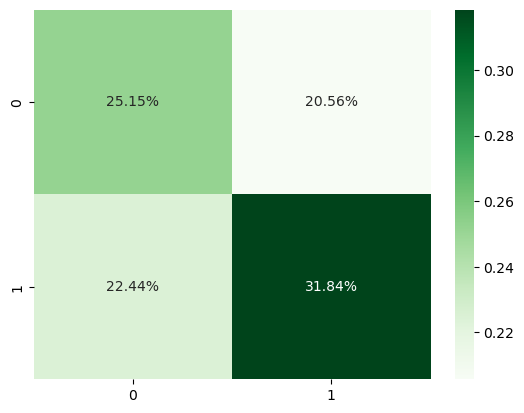

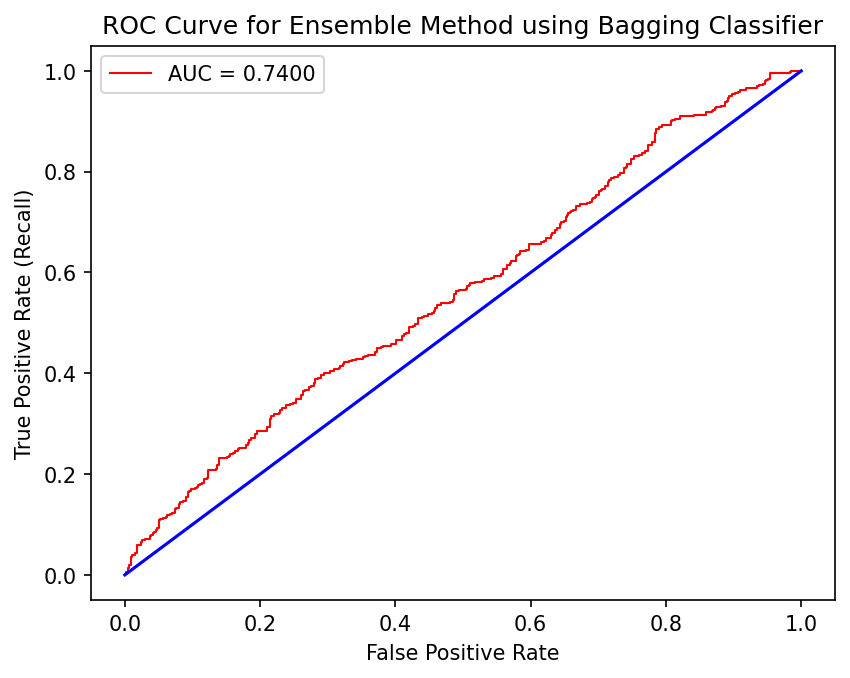

In [151]:
# calculating confusion matrix, precision, recall, ROC curve for ensemble method using Bagging Classifier
# confusion matrix
cf_matrix = confusion_matrix(stress_cog_y_test, stress_cog_y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Greens')
print(cf_matrix)
# precision
precision = precision_score(stress_cog_y_test, stress_cog_y_pred)
print('\n Precision of the model: ')
print(precision)
# recall
recall = recall_score(stress_cog_y_test, stress_cog_y_pred)
print('\n Recall of the model: ')
print(recall)
# ROC Curve
stress_cog_y_prob = stress_cog_bagging.predict_proba(stress_cog_X_test)
fpr, tpr, thresholds = roc_curve(stress_cog_y_test, stress_cog_y_prob[:,0], pos_label=0)
area_roc_auc = auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='red', label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color = 'b')
plt.title('ROC Curve for Ensemble Method using Bagging Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

In [40]:
# ensemble method using BoostingClassifier()
stress_cog_boosting = GradientBoostingClassifier() 
stress_cog_boosting.fit(stress_cog_X_train, stress_cog_y_train)
stress_cog_y_pred = stress_cog_boosting.predict(stress_cog_X_test)
print('Accuracy of ensemble method using Boosting Classifier on test set: {:.4f}'.format(accuracy_score(stress_cog_y_test, stress_cog_y_pred)))

Accuracy of ensemble method using Boosting Classifier on test set: 0.5699


[[214 175]
 [191 271]]

 Precision of the model: 
0.6076233183856502

 Recall of the model: 
0.5865800865800865


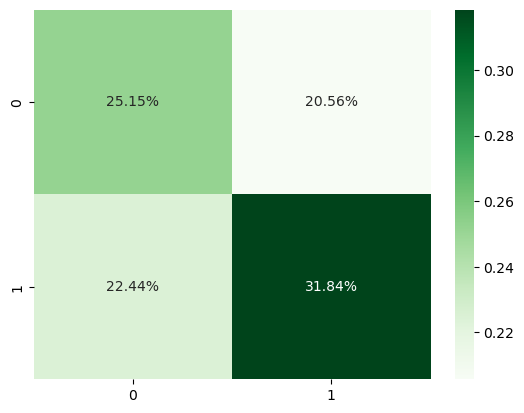

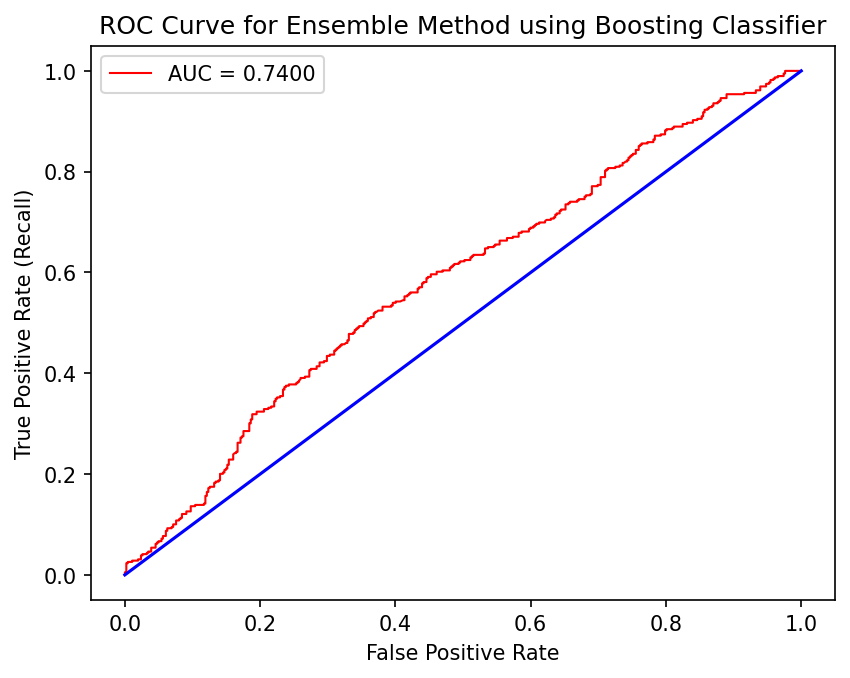

In [150]:
# calculating confusion matrix, precision, recall, ROC curve for ensemble method using Boosting Classifier
# confusion matrix
cf_matrix = confusion_matrix(stress_cog_y_test, stress_cog_y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Greens')
print(cf_matrix)
# precision
precision = precision_score(stress_cog_y_test, stress_cog_y_pred)
print('\n Precision of the model: ')
print(precision)
# recall
recall = recall_score(stress_cog_y_test, stress_cog_y_pred)
print('\n Recall of the model: ')
print(recall)
# ROC Curve
stress_cog_y_prob = stress_cog_boosting.predict_proba(stress_cog_X_test)
fpr, tpr, thresholds = roc_curve(stress_cog_y_test, stress_cog_y_prob[:,0], pos_label=0)
area_roc_auc = auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='red', label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color = 'b')
plt.title('ROC Curve for Ensemble Method using Boosting Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

In [41]:
# for perceptual/biological processes
stress_percept_bio = stress_analysis.iloc[1 : , 39 : 47].drop(columns = ['lex_liwc_bio'])
stress_percept_bio_X = preprocessing.StandardScaler().fit_transform(stress_percept_bio)
print(stress_percept_bio_X)
stress_percept_bio_y = stress_analysis.iloc[1 : , 0]
print(stress_percept_bio_y)

[[ 0.31524276 -0.54467517 -0.62694536 ... -0.70146538 -0.31258829
  -0.30049107]
 [-0.52132329 -0.54467517 -0.62694536 ... -0.70146538 -0.31258829
  -0.30049107]
 [ 0.47891872 -0.54467517  3.14361114 ... -0.70146538  0.2268328
  -0.02665786]
 ...
 [ 0.83354998 -0.54467517 -0.62694536 ...  1.39766844 -0.31258829
  -0.30049107]
 [ 3.48873787 -0.54467517 -0.62694536 ... -0.70146538 -0.31258829
   0.7874409 ]
 [-0.52132329  2.5730638  -0.62694536 ... -0.70146538 -0.31258829
  -0.30049107]]
1       0
2       1
3       1
4       1
5       1
       ..
2833    0
2834    1
2835    0
2836    0
2837    1
Name: label, Length: 2834, dtype: int64


In [42]:
# split into train and test data
stress_percept_bio_X_train, stress_percept_bio_X_test, stress_percept_bio_y_train, stress_percept_bio_y_test = train_test_split(stress_percept_bio_X, stress_percept_bio_y, test_size=0.30)

In [43]:
# logistic regression
stress_percept_bio_logreg = LogisticRegression()
stress_percept_bio_logreg.fit(stress_percept_bio_X_train, stress_percept_bio_y_train)
stress_percept_bio_y_pred = stress_percept_bio_logreg.predict(stress_percept_bio_X_test)
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(accuracy_score(stress_percept_bio_y_test, stress_percept_bio_y_pred)))

Accuracy of logistic regression classifier on test set: 0.6110


In [44]:
# gaussian naive bayes
stress_percept_bio_gaussianNB = GaussianNB()
stress_percept_bio_gaussianNB.fit(stress_percept_bio_X_train, stress_percept_bio_y_train)
stress_percept_bio_y_pred = stress_percept_bio_gaussianNB.predict(stress_percept_bio_X_test)
print('Accuracy of gaussian naive bayes classifier on test set: {:.4f}'.format(accuracy_score(stress_percept_bio_y_test, stress_percept_bio_y_pred)))

Accuracy of gaussian naive bayes classifier on test set: 0.6169


In [45]:
# decision tree classifier
stress_percept_bio_dectree = DecisionTreeClassifier(criterion='entropy',random_state=0) 
stress_percept_bio_dectree.fit(stress_percept_bio_X_train,stress_percept_bio_y_train)
stress_percept_bio_y_pred = stress_percept_bio_dectree.predict(stress_percept_bio_X_test)
print('Accuracy of decision tree classifier on test set: {:.4f}'.format(accuracy_score(stress_percept_bio_y_test, stress_percept_bio_y_pred)))

Accuracy of decision tree classifier on test set: 0.5476


In [46]:
# support vector machines with linear kernel
stress_percept_bio_svm = svm.SVC(kernel="linear")
stress_percept_bio_svm.fit(stress_percept_bio_X_train, stress_percept_bio_y_train)
stress_percept_bio_y_pred = stress_percept_bio_svm.predict(stress_percept_bio_X_test)
print('Accuracy of support vector machine on test set: {:.4f}'.format(accuracy_score(stress_percept_bio_y_test, stress_percept_bio_y_pred)))

Accuracy of support vector machine on test set: 0.6005


In [47]:
# ensemble method using VotingClassifier()
ensemble_model_1 = LogisticRegression()
ensemble_model_2 = svm.SVC(kernel="linear")
ensemble_model_3 = RandomForestClassifier()
ensemble_final_model = VotingClassifier(estimators=[('lr', ensemble_model_1), ('svm', ensemble_model_2), ('rf', ensemble_model_3)], voting='hard')
ensemble_final_model.fit(stress_percept_bio_X_train, stress_percept_bio_y_train)
y_pred_final = ensemble_final_model.predict(stress_percept_bio_X_test)
print(log_loss(stress_percept_bio_y_pred, y_pred_final))
print('Accuracy of ensemble method (Voting Classifier) on test set: {:.4f}'.format(accuracy_score(stress_percept_bio_y_test, stress_percept_bio_y_pred)))

2.1511124888327107
Accuracy of ensemble method (Voting Classifier) on test set: 0.6005


In [48]:
# ensemble method using BaggingClassifier()
stress_percept_bio_bagging = BaggingClassifier(base_estimator=xgb.XGBClassifier())
stress_percept_bio_bagging.fit(stress_percept_bio_X_train, stress_percept_bio_y_train)
stress_percept_bio_y_pred = stress_percept_bio_bagging.predict(stress_percept_bio_X_test)
print('Accuracy of ensemble method using Bagging Classifier on test set: {:.4f}'.format(accuracy_score(stress_percept_bio_y_test, stress_percept_bio_y_pred)))

Accuracy of ensemble method using Bagging Classifier on test set: 0.5899


In [49]:
# ensemble method using BoostingClassifier()
stress_percept_bio_boosting = GradientBoostingClassifier() 
stress_percept_bio_boosting.fit(stress_percept_bio_X_train, stress_percept_bio_y_train)
stress_percept_bio_y_pred = stress_percept_bio_boosting.predict(stress_percept_bio_X_test)
print('Accuracy of ensemble method using Boosting Classifier on test set: {:.4f}'.format(accuracy_score(stress_percept_bio_y_test, stress_percept_bio_y_pred)))

Accuracy of ensemble method using Boosting Classifier on test set: 0.6005


In [50]:
# for time orientations
stress_time_X = preprocessing.StandardScaler().fit_transform(stress_analysis.iloc[1 : , 47 : 50])
print(stress_time_X)
stress_time_y = stress_analysis.iloc[1 : , 0]
print(stress_time_y)

[[-1.01858479  0.25403577 -0.18005093]
 [-0.36206702  0.36227782  0.42523668]
 [ 0.64606888  0.15289156 -0.0562421 ]
 ...
 [-1.24480065 -0.06891591  1.24375062]
 [-1.24480065  1.4659918   1.20935927]
 [ 2.20745009 -0.00858428 -0.81285162]]
1       0
2       1
3       1
4       1
5       1
       ..
2833    0
2834    1
2835    0
2836    0
2837    1
Name: label, Length: 2834, dtype: int64


In [51]:
# split into train and test data
stress_time_X_train, stress_time_X_test, stress_time_y_train, stress_time_y_test = train_test_split(stress_time_X, stress_time_y, test_size=0.30)

In [52]:
# logistic regression
stress_time_logreg = LogisticRegression()
stress_time_logreg.fit(stress_time_X_train, stress_time_y_train)
stress_time_y_pred = stress_time_logreg.predict(stress_time_X_test)
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(accuracy_score(stress_time_y_test, stress_time_y_pred)))

Accuracy of logistic regression classifier on test set: 0.5969


In [53]:
# gaussian naive bayes
stress_time_gaussianNB = GaussianNB()
stress_time_gaussianNB.fit(stress_time_X_train, stress_time_y_train)
stress_time_y_pred = stress_time_gaussianNB.predict(stress_time_X_test)
print('Accuracy of gaussian naive bayes classifier on test set: {:.4f}'.format(accuracy_score(stress_time_y_test, stress_time_y_pred)))

Accuracy of gaussian naive bayes classifier on test set: 0.5840


In [54]:
# decision tree classifier
stress_time_dectree = DecisionTreeClassifier(criterion='entropy',random_state=0) 
stress_time_dectree.fit(stress_time_X_train,stress_time_y_train)
stress_time_y_pred = stress_time_dectree.predict(stress_time_X_test)
print('Accuracy of decision tree classifier on test set: {:.4f}'.format(accuracy_score(stress_time_y_test, stress_time_y_pred)))

Accuracy of decision tree classifier on test set: 0.5511


In [55]:
# support vector machines with linear kernel
stress_time_svm = svm.SVC(kernel="linear")
stress_time_svm.fit(stress_time_X_train, stress_time_y_train)
stress_time_y_pred = stress_time_svm.predict(stress_time_X_test)
print('Accuracy of support vector machine on test set: {:.4f}'.format(accuracy_score(stress_time_y_test, stress_time_y_pred)))

Accuracy of support vector machine on test set: 0.5934


In [56]:
# ensemble method using VotingClassifier()
ensemble_model_1 = LogisticRegression()
ensemble_model_2 = svm.SVC(kernel="linear")
ensemble_model_3 = RandomForestClassifier()
ensemble_final_model = VotingClassifier(estimators=[('lr', ensemble_model_1), ('svm', ensemble_model_2), ('rf', ensemble_model_3)], voting='hard')
ensemble_final_model.fit(stress_time_X_train, stress_time_y_train)
y_pred_final = ensemble_final_model.predict(stress_time_X_test)
print(log_loss(stress_time_y_pred, y_pred_final))
print('Accuracy of ensemble method (Voting Classifier) on test set: {:.4f}'.format(accuracy_score(stress_time_y_test, stress_time_y_pred)))

1.0552566141232107
Accuracy of ensemble method (Voting Classifier) on test set: 0.5934


In [57]:
# ensemble method using BaggingClassifier()
stress_time_bagging = BaggingClassifier(base_estimator=xgb.XGBClassifier())
stress_time_bagging.fit(stress_time_X_train, stress_time_y_train)
stress_time_y_pred = stress_time_bagging.predict(stress_time_X_test)
print('Accuracy of ensemble method using Bagging Classifier on test set: {:.4f}'.format(accuracy_score(stress_time_y_test, stress_time_y_pred)))

Accuracy of ensemble method using Bagging Classifier on test set: 0.5488


In [58]:
# ensemble method using BoostingClassifier()
stress_time_boosting = GradientBoostingClassifier() 
stress_time_boosting.fit(stress_time_X_train, stress_time_y_train)
stress_time_y_pred = stress_time_boosting.predict(stress_time_X_test)
print('Accuracy of ensemble method using Boosting Classifier on test set: {:.4f}'.format(accuracy_score(stress_time_y_test, stress_time_y_pred)))

Accuracy of ensemble method using Boosting Classifier on test set: 0.5535


In [59]:
# all features combined
stress_all = stress_analysis.iloc[1 : , 1 : ].drop(columns=['lex_liwc_function', 'lex_liwc_affect', 'lex_liwc_social', 'lex_liwc_cogproc', 'lex_liwc_percept', 'lex_liwc_bio'])
stress_all_X = preprocessing.StandardScaler().fit_transform(stress_all)
stress_all_y = stress_analysis.iloc[1 : , 0]

In [60]:
# split into train and test data
stress_all_X_train, stress_all_X_test, stress_all_y_train, stress_all_y_test = train_test_split(stress_all_X, stress_all_y, test_size=0.30)

In [61]:
# logistic regression
stress_all_logreg = LogisticRegression()
stress_all_logreg.fit(stress_all_X_train, stress_all_y_train)
stress_all_y_pred = stress_all_logreg.predict(stress_all_X_test)
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(accuracy_score(stress_all_y_test, stress_all_y_pred)))

Accuracy of logistic regression classifier on test set: 0.7462


In [62]:
# gaussian naive bayes
stress_all_gaussianNB = GaussianNB()
stress_all_gaussianNB.fit(stress_all_X_train, stress_all_y_train)
stress_all_y_pred = stress_all_gaussianNB.predict(stress_all_X_test)
print('Accuracy of gaussian naive bayes classifier on test set: {:.4f}'.format(accuracy_score(stress_all_y_test, stress_all_y_pred)))

Accuracy of gaussian naive bayes classifier on test set: 0.7333


In [63]:
# decision tree classifier
stress_all_dectree = DecisionTreeClassifier(criterion='entropy',random_state=0) 
stress_all_dectree.fit(stress_all_X_train,stress_all_y_train)
stress_all_y_pred = stress_all_dectree.predict(stress_all_X_test)
print('Accuracy of decision tree classifier on test set: {:.4f}'.format(accuracy_score(stress_all_y_test, stress_all_y_pred)))

Accuracy of decision tree classifier on test set: 0.6769


In [64]:
# support vector machines with linear kernel
stress_all_svm = svm.SVC(kernel="linear")
stress_all_svm.fit(stress_all_X_train, stress_all_y_train)
stress_all_y_pred = stress_all_svm.predict(stress_all_X_test)
print('Accuracy of support vector machine on test set: {:.4f}'.format(accuracy_score(stress_all_y_test, stress_all_y_pred)))

Accuracy of support vector machine on test set: 0.7438


In [65]:
# ensemble method using VotingClassifier()
ensemble_model_1 = LogisticRegression()
ensemble_model_2 = svm.SVC(kernel="linear")
ensemble_model_3 = RandomForestClassifier()
ensemble_final_model = VotingClassifier(estimators=[('lr', ensemble_model_1), ('svm', ensemble_model_2), ('rf', ensemble_model_3)], voting='hard')
ensemble_final_model.fit(stress_all_X_train, stress_all_y_train)
y_pred_final = ensemble_final_model.predict(stress_all_X_test)
print(log_loss(stress_all_y_pred, y_pred_final))
print('Accuracy of ensemble method (Voting Classifier) on test set: {:.4f}'.format(accuracy_score(stress_all_y_test, stress_all_y_pred)))

0.36527965398513274
Accuracy of ensemble method (Voting Classifier) on test set: 0.7438


In [66]:
# ensemble method using BaggingClassifier()
stress_all_bagging = BaggingClassifier(base_estimator=xgb.XGBClassifier())
stress_all_bagging.fit(stress_all_X_train, stress_all_y_train)
stress_all_y_pred = stress_all_bagging.predict(stress_all_X_test)
print('Accuracy of ensemble method using Bagging Classifier on test set: {:.4f}'.format(accuracy_score(stress_all_y_test, stress_all_y_pred)))

Accuracy of ensemble method using Bagging Classifier on test set: 0.7497


In [67]:
# ensemble method using BoostingClassifier()
stress_all_boosting = GradientBoostingClassifier() 
stress_all_boosting.fit(stress_all_X_train, stress_all_y_train)
stress_all_y_pred = stress_all_boosting.predict(stress_all_X_test)
print('Accuracy of ensemble method using Boosting Classifier on test set: {:.4f}'.format(accuracy_score(stress_all_y_test, stress_all_y_pred)))

Accuracy of ensemble method using Boosting Classifier on test set: 0.7474
